In [909]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [910]:
data = pd.read_csv('../framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [911]:
one = len(data[data['TenYearCHD'] == 1])
zero = len(data[data['TenYearCHD'] == 0])
print(one, zero)

628 3505


In [912]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [913]:
# data.isna().sum()

In [914]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [915]:
# data.drop(['education'],axis=1,inplace=True)
# data.head()


In [916]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [917]:
data.drop(columns=['education'], inplace=True)

In [918]:
selec_col = ['male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [919]:
# data = data[selec_col]

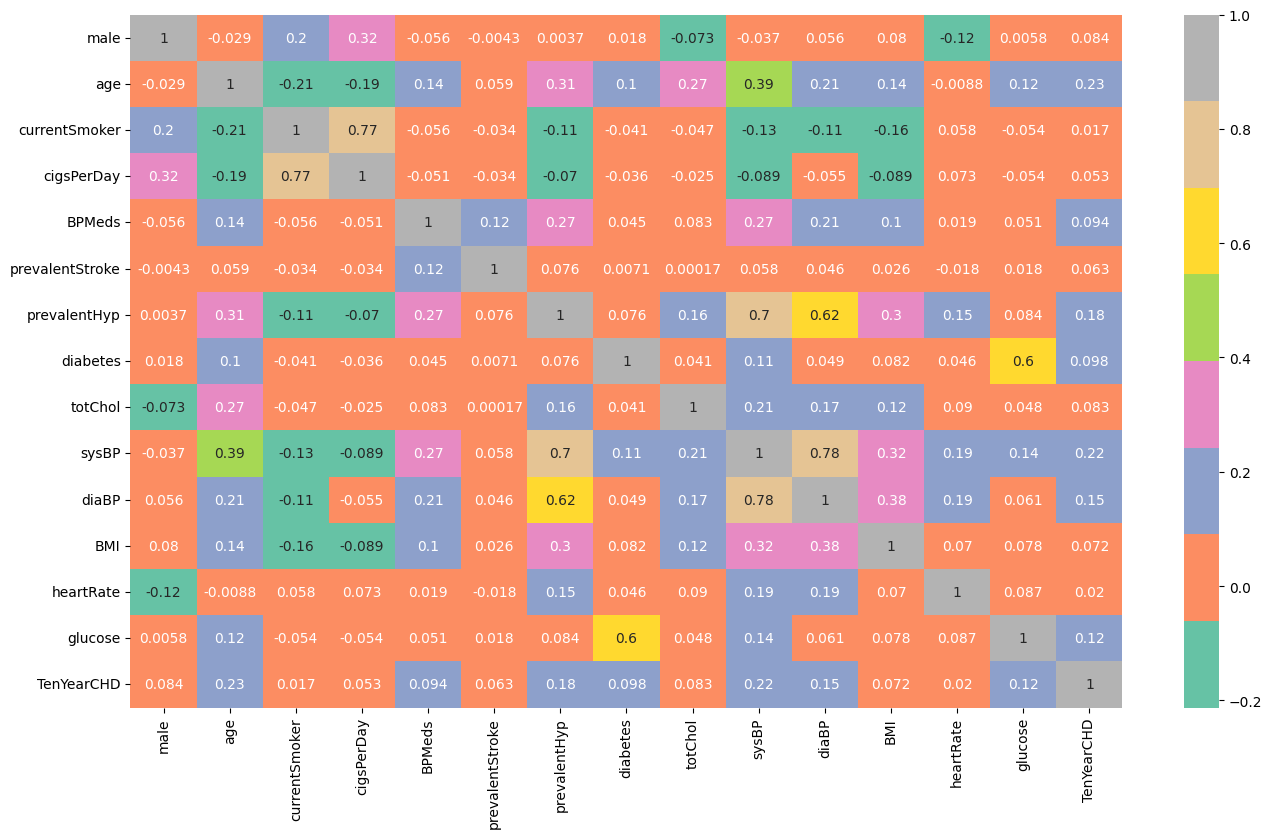

In [920]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, cmap='Set2')
plt.show()

In [921]:
X = data.iloc[:,:14]
Y = data.iloc[:,14:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state=1)


In [922]:
X_test.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2534,1,59,1,3.0,0.0,0,1,1,230.0,182.0,102.0,25.91,66.0,147.0
804,0,47,1,20.0,0.0,0,0,0,328.0,134.0,87.0,22.34,92.0,99.0
3486,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,24.62,70.0,83.0
709,0,53,0,0.0,0.0,0,0,0,245.0,103.0,68.0,21.80,60.0,63.0
2950,0,66,0,0.0,0.0,0,1,0,273.0,197.0,91.0,23.22,95.0,80.0


In [923]:
Y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4128,1
4129,0
4130,0
4131,0


In [924]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [925]:
X_train

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3296,0,61,0,0.0,0.0,0,1,0,254.0,168.0,92.0,31.63,80.0,90.0
880,1,59,1,11.0,0.0,0,0,0,176.0,134.5,87.0,31.76,80.0,93.0
108,1,51,0,0.0,0.0,0,1,0,214.0,145.0,92.5,26.09,70.0,82.0
93,0,63,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0
3348,1,51,1,9.0,0.0,0,0,0,255.0,115.0,67.0,26.97,83.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,46,0,0.0,0.0,0,0,0,229.0,127.5,80.0,22.34,84.0,77.0
2763,0,61,0,0.0,0.0,0,0,0,219.0,102.0,59.0,18.14,72.0,62.0
905,1,55,1,25.0,0.0,0,1,0,230.0,142.0,74.0,23.65,72.0,82.0
3980,0,36,0,0.0,0.0,0,0,0,195.0,116.0,76.0,22.16,88.0,77.0


In [926]:


scores = []
Y_train = np.ravel(Y_train)

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, Y_train)

    y_predict = knn.predict(X_test)

    scores.append(round(accuracy_score(Y_test, y_predict),5) * 100)



In [927]:
scores

[74.87899999999999,
 79.227,
 77.778,
 80.193,
 78.744,
 79.952,
 79.469,
 80.676,
 80.435,
 81.401,
 81.401,
 81.884,
 81.643,
 81.884,
 81.643,
 81.643,
 81.884,
 81.884,
 81.643,
 81.643,
 81.643,
 81.884,
 81.884,
 81.884,
 81.643,
 81.884,
 81.643,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884,
 81.884]

In [928]:
max = np.argmax(np.array(scores)) + 1
max

12

In [938]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=12)

In [939]:
y_predict = knn.predict(X_test)

round(accuracy_score(Y_test, y_predict), 5) *100

81.884

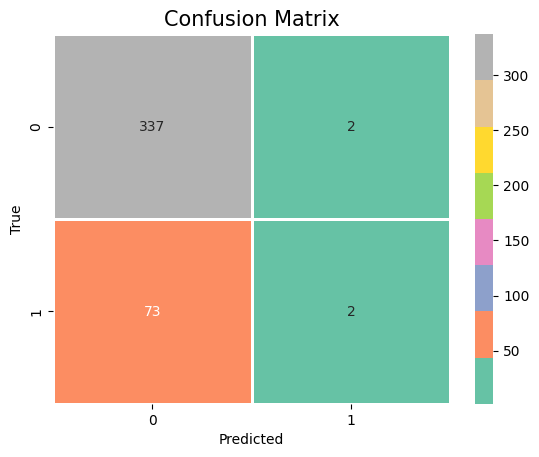

In [931]:
class_lable = [0,1]

cm = confusion_matrix(Y_test, y_predict)

df = pd.DataFrame(cm, index=class_lable, columns=class_lable)

sns.heatmap(df, annot=True, cmap='Set2', linewidths=2, fmt='d')

plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [932]:
data_test = pd.DataFrame(X_test, columns=selec_col)
data_test

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2534,1,59,1,3.0,0.0,0,1,1,230.0,182.0,102.0,25.91,66.0,147.0
804,0,47,1,20.0,0.0,0,0,0,328.0,134.0,87.0,22.34,92.0,99.0
3486,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,24.62,70.0,83.0
709,0,53,0,0.0,0.0,0,0,0,245.0,103.0,68.0,21.80,60.0,63.0
2950,0,66,0,0.0,0.0,0,1,0,273.0,197.0,91.0,23.22,95.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1,35,0,0.0,0.0,0,0,0,290.0,108.0,72.0,22.91,55.0,84.0
3891,0,55,0,0.0,0.0,0,0,0,266.0,131.0,76.0,26.45,72.0,84.0
3001,0,51,0,0.0,0.0,0,1,0,177.0,141.0,92.0,29.64,72.0,130.0
2181,1,54,1,43.0,0.0,0,0,0,288.0,145.0,92.5,26.20,72.0,98.0


In [933]:
predict = data_test.iloc[0:1]
predict

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2534,1,59,1,3.0,0.0,0,1,1,230.0,182.0,102.0,25.91,66.0,147.0


In [934]:
Y_score = knn.predict(predict)[0]
Y_score

1

In [935]:
Y_score = knn.predict_proba(predict)[0]
Y_score

array([0.41666667, 0.58333333])